Step1: load cleaned data

In [ ]:
import pandas as pd 
import numpy as np

from src.cohort_utils import build_cohort_columns, cohort_retention

df = pd.read_csv("../data/cleaned_online_retail.csv")
df['order_month'] = pd.to_datetime(df['order_month']).dt.to_period('M')
df['cohort_month'] = pd.to_datetime(df['cohort_month']).dt.to_period('M')

df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,order_month,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12,1


Step2: build cohort counts

In [2]:
cohort_data = (
    df.groupby(['cohort_month', 'cohort_index'])['customerid']
    .nunique()
    .reset_index()
    
)

cohort_data.head()

,cohort_month,cohort_index,customerid
0,2010-12,1,885
1,2010-12,2,324
2,2010-12,3,286
3,2010-12,4,340
4,2010-12,5,321


 Step3: pivot into cohort matrix 

In [3]:
cohort_pivot = cohort_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='customerid'
)

cohort_pivot.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN


Step4: convert to retention rates 

Retention is always relative to cohort size

In [4]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

retention.round(3)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,1.0,0.366,0.323,0.384,0.363,0.398,0.363,0.349,0.354,0.395,0.374,0.503,0.266
2011-01,1.0,0.221,0.266,0.230,0.321,0.288,0.247,0.242,0.300,0.326,0.365,0.118,NaN
2011-02,1.0,0.187,0.187,0.284,0.271,0.247,0.253,0.279,0.247,0.305,0.068,NaN,NaN
2011-03,1.0,0.150,0.252,0.199,0.223,0.168,0.268,0.230,0.279,0.086,NaN,NaN,NaN
2011-04,1.0,0.213,0.203,0.210,0.197,0.227,0.217,0.260,0.073,NaN,NaN,NaN,NaN
2011-05,1.0,0.190,0.173,0.173,0.208,0.232,0.264,0.095,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.174,0.157,0.264,0.231,0.335,0.095,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.181,0.207,0.223,0.271,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207,0.249,0.243,0.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step5: heatmap visualization 

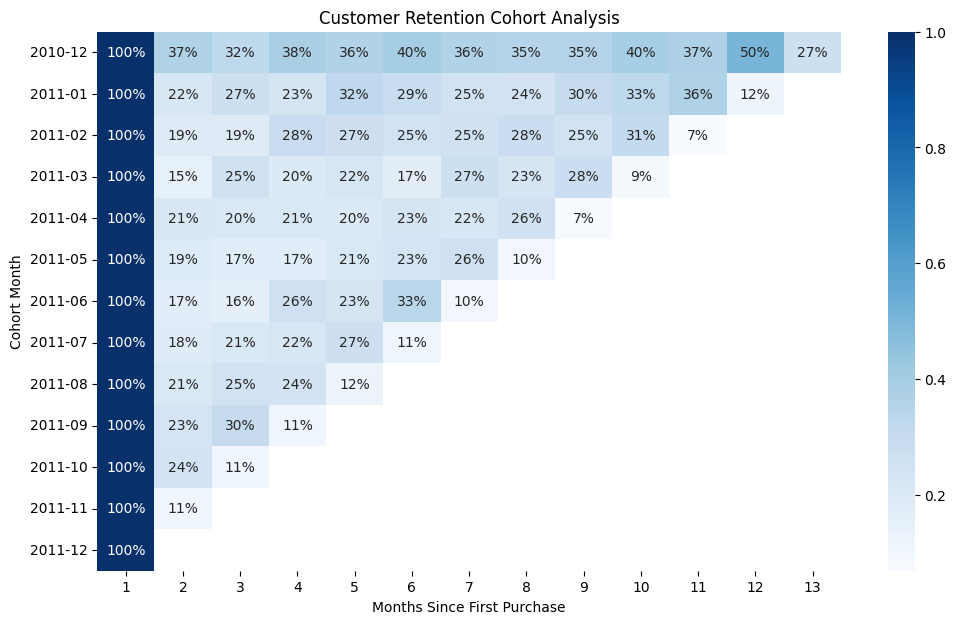

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12, 7))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since First Purchase")
plt.show()

Key Retention Insigths 

* Most cohorts drop to roughly 20-35% retention by thw second month, indicating a very steep early-stage churn and a large proportion of one-time buyers.
* Retention curves begin to flatten after months 4-5, suggesting the presence of a small but relatively stable loyal customer base.
* Older cohorts (2010-early 2011) retain customer better than later cohorts, which may indicate a shift in customer quality, marketing channels, or product experiance over time.
* No cohort demonstates strong long-term retention beyond 3-4 months, highlighting the absence of sustained repeat-purchase behavior.
* Early cohorts consistently outperform newer cohorts, making strong candidates for deeper analysis to identify what originally drove higher retention.


Business Implications

* The business should prioritize first-month retention strategies (onboarding emails, offers, reminders).
* Investigate what changed after early 2011 (acquisition channels, pricing, product mix).
* Design programs to convert one-time buyers into repeat customers.
* Analyze early high-retention cohorts to replicate successful conditions.
